<a href="https://colab.research.google.com/github/Maternowsky/ResumeDocuments/blob/main/Heart_Disease_Risk_from_(BRFSS)_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Disease Risk Prediction Dataset**



*   This dataset is from the Behavioral Risk Factor Surveillance System (BRFSS)
*   The data comes from health-related telephone surveys from U.S. Residents
*   This dataset came preprocessed with 19 hand picked variables from 304 unique variables
*   I obtained the dataset from kaggle.com
*   My goal for this exercise is to visualize features of dataset and find insights from dataset with relation to Heart Disease



# **Import dataset**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving CVD_cleaned.csv to CVD_cleaned.csv


In [2]:
import pandas as pd

CVDR = pd.read_csv('CVD_cleaned.csv')
df = pd.DataFrame(CVDR)
display(df)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [3]:
df.shape

(308854, 19)

## **Import Basic libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

from sklearn.preprocessing import LabelEncoder

## **Check for missing data**

In [5]:
print('CVDR Missing Values:')
print(df.isna().sum())

CVDR Missing Values:
General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


# **Explore the dataset**

In [6]:
le = LabelEncoder()
df['Heart_Disease'] = le.fit_transform(df['Heart_Disease'])

df['Heart_Disease']

0         0
1         1
2         0
3         1
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Heart_Disease, Length: 308854, dtype: int64

In [7]:
df.nunique()

General_Health                     5
Checkup                            5
Exercise                           2
Heart_Disease                      2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       99
Weight_(kg)                      525
BMI                             3654
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 77
Green_Vegetables_Consumption      75
FriedPotato_Consumption           69
dtype: int64

In [8]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                     int64
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

## **Checking heart Disease risk factors**

In [9]:
def barPerc(df,xVar,ax):
    numX=len([x for x in df[xVar].unique() if x==x])
    bars = ax.patches
    for ind in range(numX):
        hueBars=bars[ind:][::numX]
        total = sum([x.get_height() for x in hueBars])
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

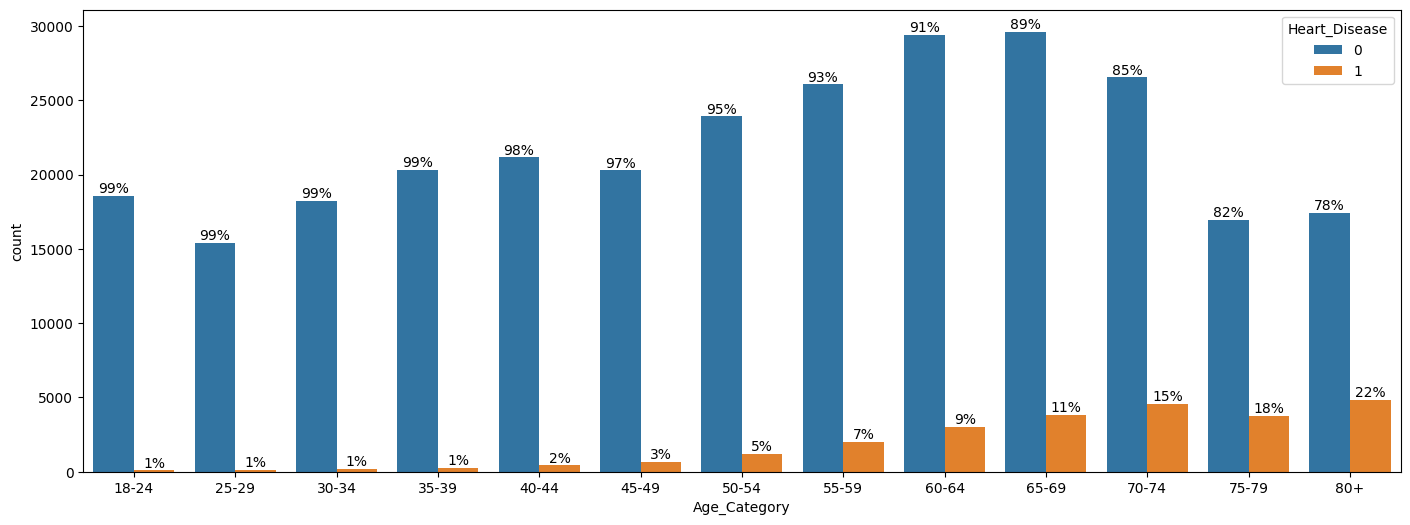

In [10]:

plt.figure(figsize=(17, 6))
ax = sns.countplot(data = df, x = 'Age_Category', hue = 'Heart_Disease',
              order = ['18-24','25-29','30-34','35-39','40-44','45-49',
                       '50-54','55-59','60-64','65-69','70-74','75-79','80+'])
barPerc(df, 'Age_Category', ax)

### **Risk of Heart Disease by Age**

1.   18 - 39  have a small risk (1%)
2.   40 - 54  have a moderate risk (2-5%)
3.   55 - 80+ have the highest risk (7-22%)



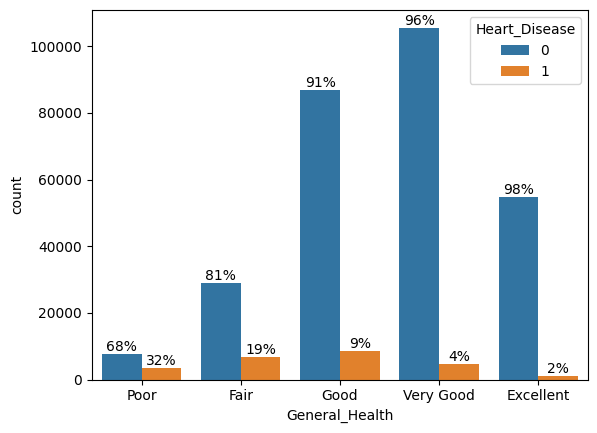

In [11]:


ax = sns.countplot(data = df, x = 'General_Health', hue = 'Heart_Disease',
             order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

barPerc(df, 'General_Health', ax)

### **General Health plays a significant factor in contracting Heart Disease. Better general health reduces your risk of heart disease significantly**

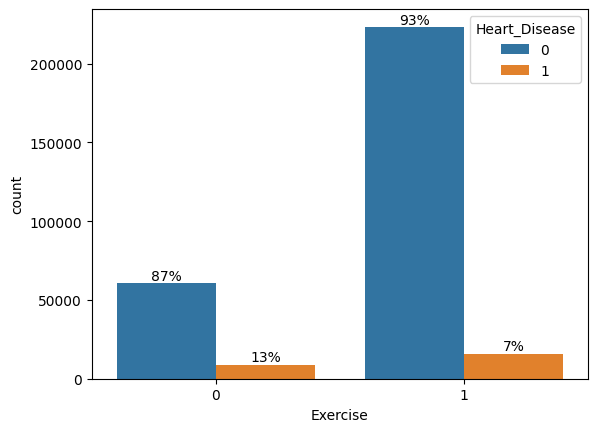

In [12]:
df['Exercise'] = le.fit_transform(df['Exercise'])
ax = sns.countplot(data = df, x = 'Exercise', hue = 'Heart_Disease')

barPerc(df, 'Exercise', ax)

### **Exercise shows a reduced risk of Heart Disease**

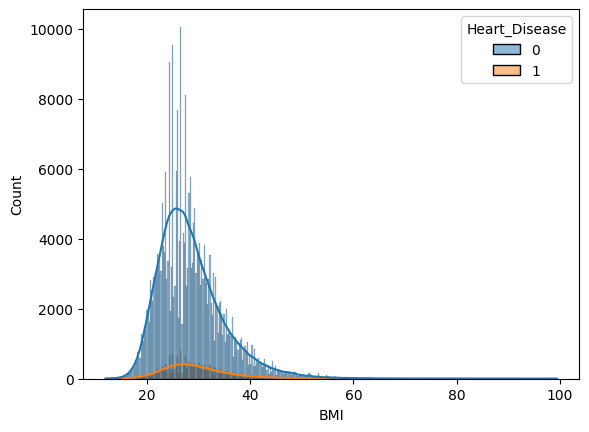

In [13]:

ax = sns.histplot(data = df, x = 'BMI', hue = 'Heart_Disease', kde = True  )

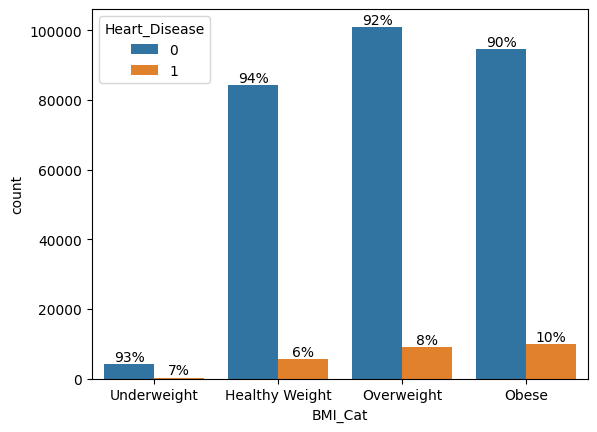

In [14]:
bmi = df['BMI']
status = []

for i in bmi:
  if i < 18.5:
    status.append('Underweight')
  elif 25 > i >= 18.5:
    status.append('Healthy Weight')
  elif 25 <= i <= 30:
    status.append('Overweight')
  else:
    status.append('Obese')

df['BMI_Cat'] = status

ax = sns.countplot(data = df, x = 'BMI_Cat', hue = 'Heart_Disease',
                   order = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese'])

barPerc(df, 'BMI_Cat', ax)

### **Separating BMI into categories we can see having a higher BMI increases risk of Heart Disease**

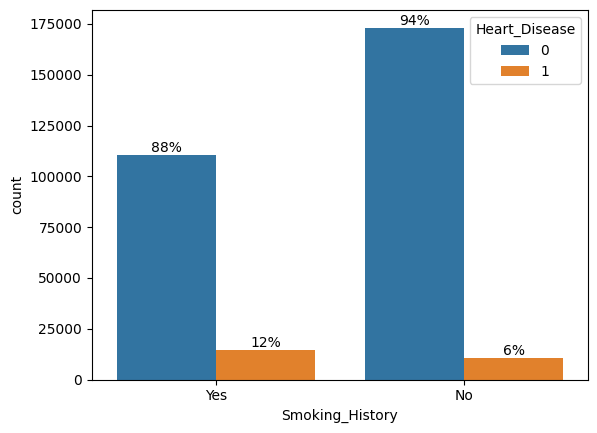

In [15]:
ax = sns.countplot(data = df, x = 'Smoking_History', hue = 'Heart_Disease')

barPerc(df, 'Smoking_History', ax)

### **Smoking looks to double your risk of Heart Disease**

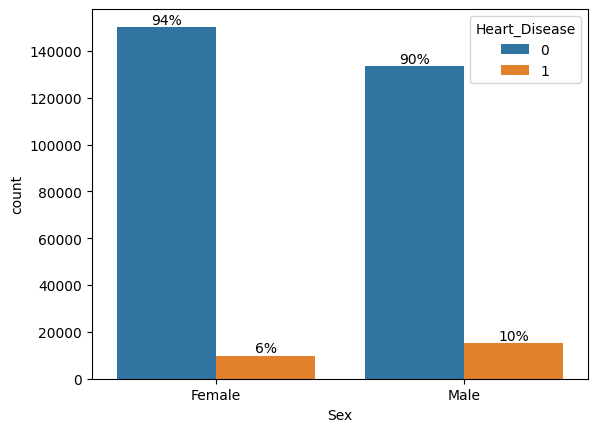

In [16]:
ax = sns.countplot(data = df, x = 'Sex', hue = 'Heart_Disease')

barPerc(df, 'Sex', ax)

### **Males have nearly double the risk of Heart Disease compared to Females**

In [17]:
# Categorizing Consumption Features

#Alcohol
ac = []
for i in df['Alcohol_Consumption']:
  if i < 5:
    ac.append('Very Low')
  elif 5 <= i < 10:
    ac.append('Low')
  elif 10 <= i < 15:
    ac.append('Moderate')
  elif 15 <= i < 20:
    ac.append('High')
  elif 20 <= i < 25:
    ac.append('Very High')
  else:
    ac.append('Extreme')

df['Alcohol_Consumption_'] = ac

#Fruit Consumption
fc = []
for i in df['Fruit_Consumption']:
  if i < 20:
    fc.append('Very Low')
  elif 20 <= i < 40:
    fc.append('Low')
  elif 40 <= i < 60:
    fc.append('Moderate')
  elif 60 <= i < 80:
    fc.append('High')
  elif 80 <= i < 100:
    fc.append('Very High')
  else:
    fc.append('Extreme')

df['Fruit_Consumption_'] = fc

#Green Vegetable Consumption
gc = []
for i in df['Green_Vegetables_Consumption']:
  if i < 20:
    gc.append('Very Low')
  elif 20 <= i < 40:
    gc.append('Low')
  elif 40 <= i < 60:
    gc.append('Moderate')
  elif 60 <= i < 80:
    gc.append('High')
  elif 80 <= i < 100:
    gc.append('Very High')
  else:
    gc.append('Extreme')

df['Green_Vegetables_Consumption_'] = gc

#Fried Potatoe Consumption
fpc = []
for i in df['FriedPotato_Consumption']:
  if i < 20:
    fpc.append('Very Low')
  elif 20 <= i < 40:
    fpc.append('Low')
  elif 40 <= i < 60:
    fpc.append('Moderate')
  elif 60 <= i < 80:
    fpc.append('High')
  elif 80 <= i < 100:
    fpc.append('Very High')
  else:
    fpc.append('Extreme')

df['FriedPotato_Consumption_'] = fpc

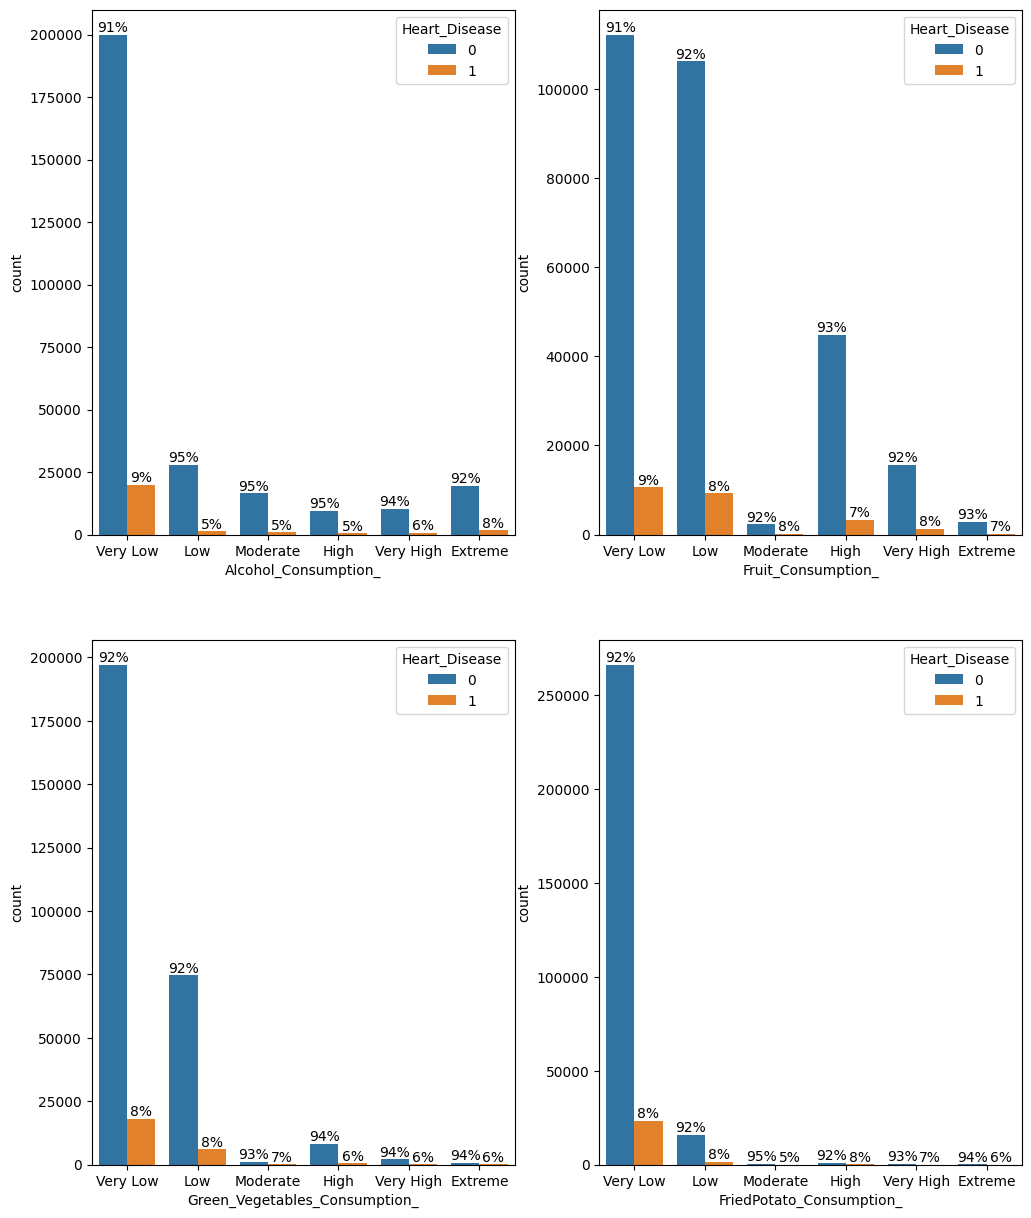

In [18]:
consumption_features = ['Alcohol_Consumption_', 'Fruit_Consumption_',
                        'Green_Vegetables_Consumption_', 'FriedPotato_Consumption_']


fig = plt.figure(figsize = (12, 15))
for i , var_name in enumerate(consumption_features):
  ax = fig.add_subplot(2,2, i+1)
  sns.countplot(data = df, x = var_name, hue = 'Heart_Disease',
                order =['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extreme'] )
  barPerc(df, var_name, ax)


### **Alcohol Consumption, Fruit Consumption, and Fried Potato Consumption look to have little to any discernable effect on Heart Disease.**


### **Green Vegetable Consumption looked to slightly reduce Heart Disease**

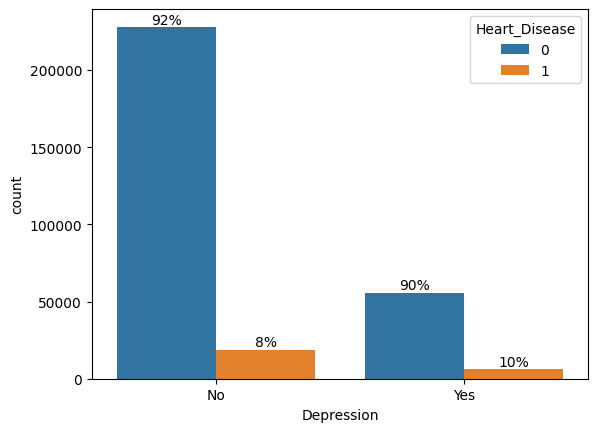

In [19]:
ax = sns.countplot(data = df, x = 'Depression', hue = 'Heart_Disease')

barPerc(df, 'Depression', ax)

### **People with depression have a slight increased risk of Heart Disease**

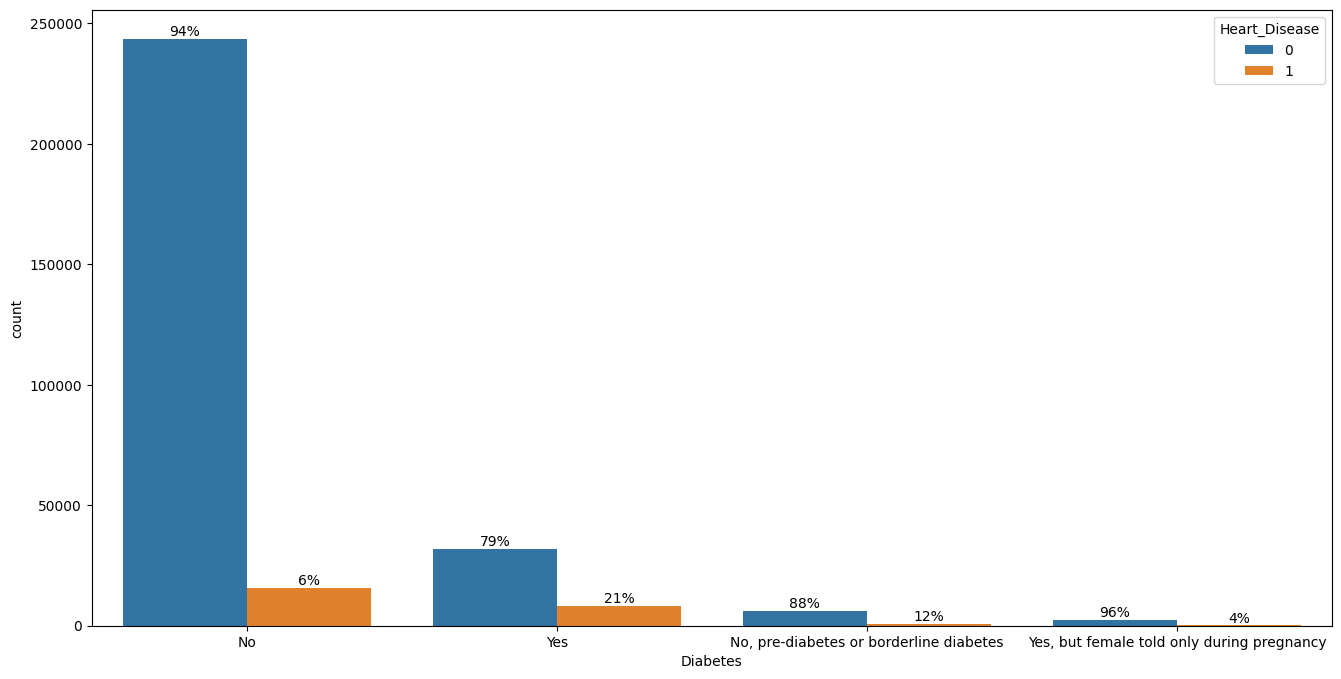

In [20]:
fig = plt.figure(figsize = (16, 8))
ax = sns.countplot(data = df, x = 'Diabetes', hue = 'Heart_Disease')

barPerc(df, 'Diabetes', ax)

### **Having Diabetes or being Pre-Diabetic increases your risk of Heart Disease. Pregnancy Diabetes does not increase your risk**

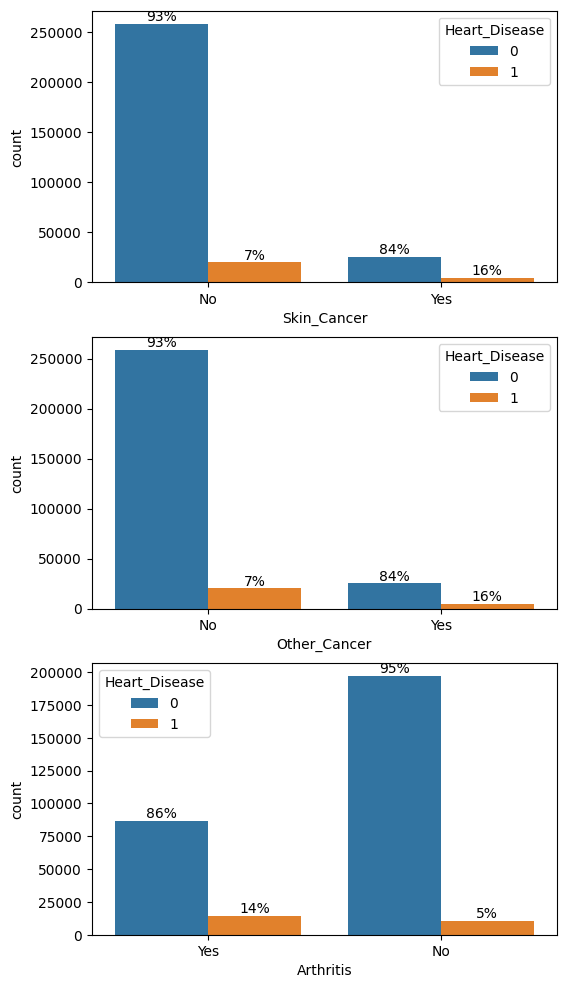

In [21]:
disease_features = ['Skin_Cancer', 'Other_Cancer', 'Arthritis']


fig = plt.figure(figsize = (6 , 12))
for i , var_name in enumerate(disease_features):
  ax = fig.add_subplot(3,1, i+1)
  sns.countplot(data = df, x = var_name, hue = 'Heart_Disease' )
  barPerc(df, var_name, ax)

### **Having Skin Cancer, Other Cancer, or Arthritis increases your risk of Heart Disease**

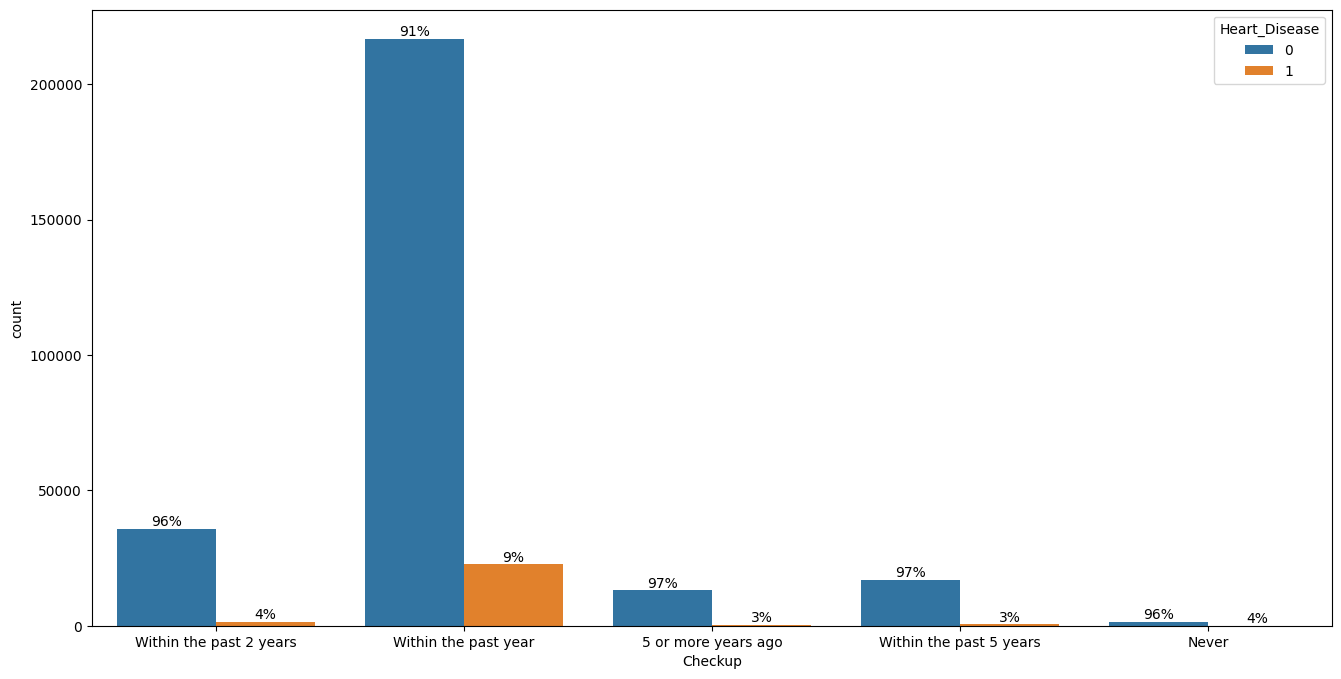

In [22]:
fig = plt.figure(figsize = (16, 8))
ax = sns.countplot(data = df, x = 'Checkup', hue = 'Heart_Disease')

barPerc(df, 'Checkup', ax)

### **People who have had a checkup within the past year have an increased risk of Heart Disease**

# **Conclusion/Insights**





## **High Risk**

*   People over the age of 55 start to have a high risk of Heart Disease increasing with their age
*   As peoples general health declines thier risk of Heart Disease increases
*   People with Cancers and or Arthritis have a higher risk of Heart Disease



## **Moderate Risk**

*   Risk of Heart Disease slightly increases if a person in overweight or underweight according to BMI
*   Smoking slightly increase the risk of Heart Disease
*   Males had a slightly higher risk of Heart Disease
*   People who have had a Checkup with their doctor more recently are at a higher risk of Heart Disease



## **Risk Reduction**

*   Exercise reduces your risk of Heart Disease
*   Eating green vegetables slightly reduces your risk of Heart Disease



## **Factors that were unimportant**

*   Depression, Alcohol Consumption, Fruit Consumption, and Fried Potato Consumption all had little to no discernable correlation to Heart Disease

